In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from datetime import datetime
# import re

In [2]:
with sqlite3.connect('../Compressed/amazon-fine-food-reviews/database.sqlite') as con:
    print ("Opened database successfully")
    df = pd.read_sql_query('SELECT * FROM Reviews', con = con)
    columns = pd.read_sql_query('PRAGMA table_info(Reviews)', con = con)
    print(columns)
df.describe()

Opened database successfully
   cid                    name     type  notnull dflt_value  pk
0    0                      Id  INTEGER        0       None   1
1    1               ProductId     TEXT        0       None   0
2    2                  UserId     TEXT        0       None   0
3    3             ProfileName     TEXT        0       None   0
4    4    HelpfulnessNumerator  INTEGER        0       None   0
5    5  HelpfulnessDenominator  INTEGER        0       None   0
6    6                   Score  INTEGER        0       None   0
7    7                    Time  INTEGER        0       None   0
8    8                 Summary     TEXT        0       None   0
9    9                    Text     TEXT        0       None   0


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [3]:
df.shape

(568454, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568454 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568454 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
def changeDateFormat(Time):
    reviewDate = []
    for time in Time:
        dt = datetime.fromtimestamp(time)
        date = dt.strftime("%Y-%m-%d")
        reviewDate.append(date)
    dateSer = pd.Series(reviewDate)
    return dateSer
time = df.loc[:, 'Time']
dateSer = changeDateFormat(time)
df.loc[:, 'Time'] = dateSer

In [6]:
df.loc[:, 'Time'] = pd.to_datetime(df.loc[:, 'Time'],
                                    format = '%Y-%m-%d',
                                    errors= 'coerce')
df = df.dropna(subset = ['Time'])

In [7]:
df['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [8]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
RateMsg = df.loc[:,['ProductId', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']]
RateMsg.head()

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
0,B001E4KFG0,1,1,5,2011-04-27
1,B00813GRG4,0,0,1,2012-09-07
2,B000LQOCH0,1,1,4,2008-08-18
3,B000UA0QIQ,3,3,2,2011-06-13
4,B006K2ZZ7K,0,0,5,2012-10-21


In [10]:
ReviewCount = RateMsg['ProductId'].value_counts()
ReviewCount.head()

B007JFMH8M    913
B002QWHJOU    632
B002QWP8H0    632
B0026RQTGE    632
B002QWP89S    632
Name: ProductId, dtype: int64

In [11]:
Score = ProductRate = RateMsg.groupby('ProductId')['Score'].mean()

In [12]:
ProductRate.head()

ProductId
0006641040    4.351351
141278509X    5.000000
2734888454    3.500000
2841233731    5.000000
7310172001    4.751445
Name: Score, dtype: float64

In [13]:
ProductRate.tail()

ProductId
B009UOFTUI    1.0
B009UOFU20    1.0
B009UUS05I    5.0
B009WSNWC4    5.0
B009WVB40S    5.0
Name: Score, dtype: float64

In [14]:
ProductRate.sort_values(ascending=False).head()

ProductId
B009WVB40S    5.0
B0022N49KU    5.0
B0022N6OBM    5.0
B0022N6CH8    5.0
B0022N6CFU    5.0
Name: Score, dtype: float64

In [15]:
ProductRate['7310172001']

4.7514450867052025

In [16]:
np.percentile(ProductRate,25)

3.7837837837837838

In [17]:
np.percentile(ProductRate,50)

4.5

In [18]:
np.percentile(ProductRate,75)

5.0

In [19]:
RateMsg.groupby('Score')['HelpfulnessNumerator'].sum()

Score
1    142964
2     55341
3     72529
4    112134
5    608312
Name: HelpfulnessNumerator, dtype: int64

In [20]:
RateMsg.groupby('Score')['HelpfulnessDenominator'].sum()

Score
1    254536
2     92365
3    105167
4    134378
5    680530
Name: HelpfulnessDenominator, dtype: int64

In [21]:
HelpfulnessDenominator = RateMsg.groupby('ProductId')['HelpfulnessDenominator'].sum()

In [22]:
HelpfulnessNumerator = RateMsg.groupby('ProductId')['HelpfulnessNumerator'].sum()

In [23]:
RateResult = pd.DataFrame(columns=[])

In [24]:
RateResult['Score'] = Score

In [25]:
RateResult['HelpfulnessNumerator'] = HelpfulnessNumerator

In [26]:
RateResult['HelpfulnessDenominator'] = HelpfulnessDenominator

In [27]:
RateResult['ReviewCount'] = ReviewCount

In [28]:
type(RateResult)

pandas.core.frame.DataFrame

In [29]:
RateResult.head()

,Score,HelpfulnessNumerator,HelpfulnessDenominator,ReviewCount
ProductId,,,,
0006641040,4.351351,112,125,37
141278509X,5.000000,1,1,1
2734888454,3.500000,1,1,2
2841233731,5.000000,0,0,1
7310172001,4.751445,140,211,173


In [30]:
RateResult.tail()

,Score,HelpfulnessNumerator,HelpfulnessDenominator,ReviewCount
ProductId,,,,
B009UOFTUI,1.0,0,0,1
B009UOFU20,1.0,0,0,1
B009UUS05I,5.0,0,0,1
B009WSNWC4,5.0,0,0,1
B009WVB40S,5.0,0,0,1


In [31]:
RateMsg.loc[RateMsg['ProductId'] == '0006641040']

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
150492,0006641040,71,72,4,2004-09-29
150493,0006641040,3,3,5,2007-03-08
150494,0006641040,3,3,3,2005-10-17
150495,0006641040,3,3,5,2005-03-21
150496,0006641040,2,2,1,2012-04-18
150497,0006641040,2,2,5,2007-04-12
150498,0006641040,2,2,5,2003-10-11
150499,0006641040,2,2,5,2001-12-26
150500,0006641040,2,2,5,1999-10-25
150501,0006641040,1,1,4,2011-12-27


In [32]:
RateResult.sort_values('Score', ascending=False)

,Score,HelpfulnessNumerator,HelpfulnessDenominator,ReviewCount
ProductId,,,,
B00214BO58,5.0,0,0,2
B002PDYN44,5.0,1,1,1
B002P9QAJE,5.0,0,0,2
B002P9QRCO,5.0,0,0,1
B002PA1KW0,5.0,2,3,1
...,...,...,...,...
B003EMVVP4,1.0,0,1,1
B005GSSI0U,1.0,2,2,1
B003EMVXWK,1.0,0,0,1


In [33]:
RateResult.sort_values('ReviewCount', ascending=False)

,Score,HelpfulnessNumerator,HelpfulnessDenominator,ReviewCount
ProductId,,,,
B007JFMH8M,4.582694,41,46,913
B0026RQTGE,4.588608,611,887,632
B002QWHJOU,4.588608,611,887,632
B002QWP89S,4.588608,611,887,632
B002QWP8H0,4.588608,611,887,632
...,...,...,...,...
B000YPQC08,5.000000,0,0,1
B003YU5T6I,5.000000,0,0,1
B000YPQC44,5.000000,0,0,1


In [34]:
RateResult.sort_values('HelpfulnessDenominator', ascending=False)

,Score,HelpfulnessNumerator,HelpfulnessDenominator,ReviewCount
ProductId,,,,
B00012182G,3.582677,3989,5462,127
B000FI4O90,3.894737,3535,3894,190
B003B3OOPA,4.739968,2944,3415,623
B000VK08OC,4.491379,2630,2963,232
B001EO5Q64,4.746032,1947,2340,567
...,...,...,...,...
B002VX3E70,4.000000,0,0,1
B002VUAM32,4.000000,0,0,2
B002VT3CY4,3.000000,0,0,1


In [35]:
RateResult.sort_values('HelpfulnessNumerator', ascending=False)

,Score,HelpfulnessNumerator,HelpfulnessDenominator,ReviewCount
ProductId,,,,
B00012182G,3.582677,3989,5462,127
B000FI4O90,3.894737,3535,3894,190
B003B3OOPA,4.739968,2944,3415,623
B000VK08OC,4.491379,2630,2963,232
B004WTHCO2,3.679487,2074,2329,234
...,...,...,...,...
B002P99DOI,3.000000,0,0,2
B002P5E1EE,5.000000,0,0,1
B002P5D37K,5.000000,0,0,1


In [36]:
Y1 = [0,0,0,0]

In [37]:
Y1[3] = RateResult.loc[RateResult['Score'] >= 4, 'HelpfulnessNumerator'].sum()

In [38]:
Y1[2] = RateResult.loc[(RateResult.Score >= 3) & (RateResult.Score <= 4), 'HelpfulnessNumerator'].sum()

In [39]:
Y1[1] = RateResult.loc[(RateResult.Score >= 2) & (RateResult.Score <= 3), 'HelpfulnessNumerator'].sum()

In [40]:
Y1[0] = RateResult.loc[RateResult['Score'] <= 2, 'HelpfulnessNumerator'].sum()

In [41]:
Y2 = [0,0,0,0]

In [42]:
Y2[3] = RateResult.loc[RateResult['Score'] >= 4, 'HelpfulnessDenominator'].sum()

In [43]:
Y2[2] = RateResult.loc[(RateResult.Score >= 3) & (RateResult.Score <= 4), 'HelpfulnessDenominator'].sum()

In [44]:
Y2[1] = RateResult.loc[(RateResult.Score >= 2) & (RateResult.Score <= 3), 'HelpfulnessDenominator'].sum()

In [45]:
Y2[0] = RateResult.loc[RateResult['Score'] <= 2, 'HelpfulnessDenominator'].sum()

In [46]:
RateResult.loc[RateResult['Score'] >= 4, 'ReviewCount'].sum()

406188

In [47]:
RateResult.loc[(RateResult.Score >= 3) & (RateResult.Score <= 4), 'ReviewCount'].sum()

161912

In [48]:
RateResult.loc[(RateResult.Score >= 2) & (RateResult.Score <= 3), 'ReviewCount'].sum()

23735

In [49]:
RateResult.loc[RateResult['Score'] <= 2, 'ReviewCount'].sum()

8710

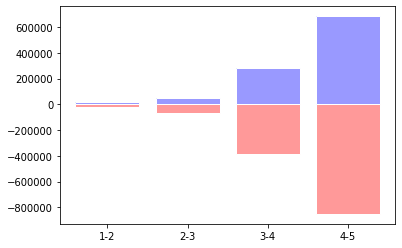

In [50]:
X = ['1-2', '2-3', '3-4', '4-5']
Y1 = np.array(Y1)
Y2 = np.array(Y2)
plot.bar(X, +Y1)
plot.bar(X, -Y2)
plot.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plot.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')
plot.show()

In [51]:
print('Y1:', Y1, '\n', 'Y1:', Y2)

Y1: [ 16457  46426 285613 685037] 
 Y1: [ 22426  65183 387211 851435]
